# Empalme con la clase anterior



## Ecuaciones Elípticas.

Se usan para, entre otros
* Encontrar la forma de una membrana
* Encontrar la temperatura estacionaria (que no depende del tiempo) en una superficie
* Encontrar el potencial eléctrico de un campo.
* El Laplaciano es un filtro suavizador.

La Ecuación es

$$\nabla² u(x,y) = \frac{\partial² u(x,y)}{\partial x² } + \frac{\partial² u(x,y) }{\partial y²} = \rho(x,y) $$

Si $\rho(x,y)=0$ se llama la Ecuacion de Laplace.
Si $\rho(x,y)\ne 0$ se llama la Ecuacion de Poisson.

Asumamos un dominio rectangular $(x,y) \in (a,b) \times (c,d)$.
Las condiciones de Direchlet (frontera) están en la frontera

$$[a, y] \cup [b, y] \cup [x, c ] \cup [x, d] $$
donde $e(y) = u(a,y)$, $f(y)=u(b,y)$, $g(x)=u(x,c)$, $h(x)=u(x,d)$.

## Formulación en diferencias finitas.
Tenemos, la malla
Se define $\Delta x$, $\Delta y$, $x_0=a$, $y_0=c$
* $x_i = x_0 + i \Delta x \quad , \quad i=0, \cdots, nx$
* $y_j = y_0 + j \Delta y \quad , \quad  j=0, \cdots, ny$
* $\Delta x = \frac{b-a}{nx}$
* $\Delta y = \frac{d-c}{ny}$





Discretizando en diferencias finitas centradas.

$$\frac{w_{i+1 j} -2 w_{ij} + w_{i-1 j}}{\Delta x²} + \frac{w_{i j+1} -2 w_{ij} + w_{i j-1}}{\Delta y²} = \rho_{ij} $$

Con condiciones de frontera
$$w_{0j} = e_j \quad ,\quad j = 0, 1, \cdots, ny $$
$$w_{nx \; j} = f_j \quad ,\quad j = 0, 1, \cdots, ny $$
$$w_{i0} = g_i \quad ,\quad i = 0, 1, \cdots, nx $$
$$w_{i \; ny} = h_i \quad ,\quad i = 0, 1, \cdots, nx $$

Vamos a crear un sistema matricial. Para esto recuerde el orden
$i+1, i, i-1, j, j+1, j-1$

Despejemos de aca $w_{i+1 j}$, multiplicamos a ambos lados por $\Delta x$

$$w_{i+1 j} - 2 w_{ij} \left ( 1 + \frac{\Delta x²}{\Delta y²} \right ) + w_{i-1 j} + \frac{\Delta x² }{\Delta y² } (w_{i j+1} + w_{i j-1}) = \Delta x² \rho_{ij} $$

Simplificasmos mediante el uso de $\beta=\Delta x/\Delta y$
$$w_{i+1 j} - 2 w_{ij} (1 + \beta²) + w_{i-1 j} + \beta² ( w_{i j+1} + w_{i j-1}) = \Delta² x \rho_{ij} \tag{2} $$

Si $\Delta x = \Delta y$, $\beta=1$

$$w_{i+1 j} - 4 w_{ij}  + w_{i-1 j} + ( w_{i j+1} + w_{i j-1}) = \Delta x² \rho_{ij} $$

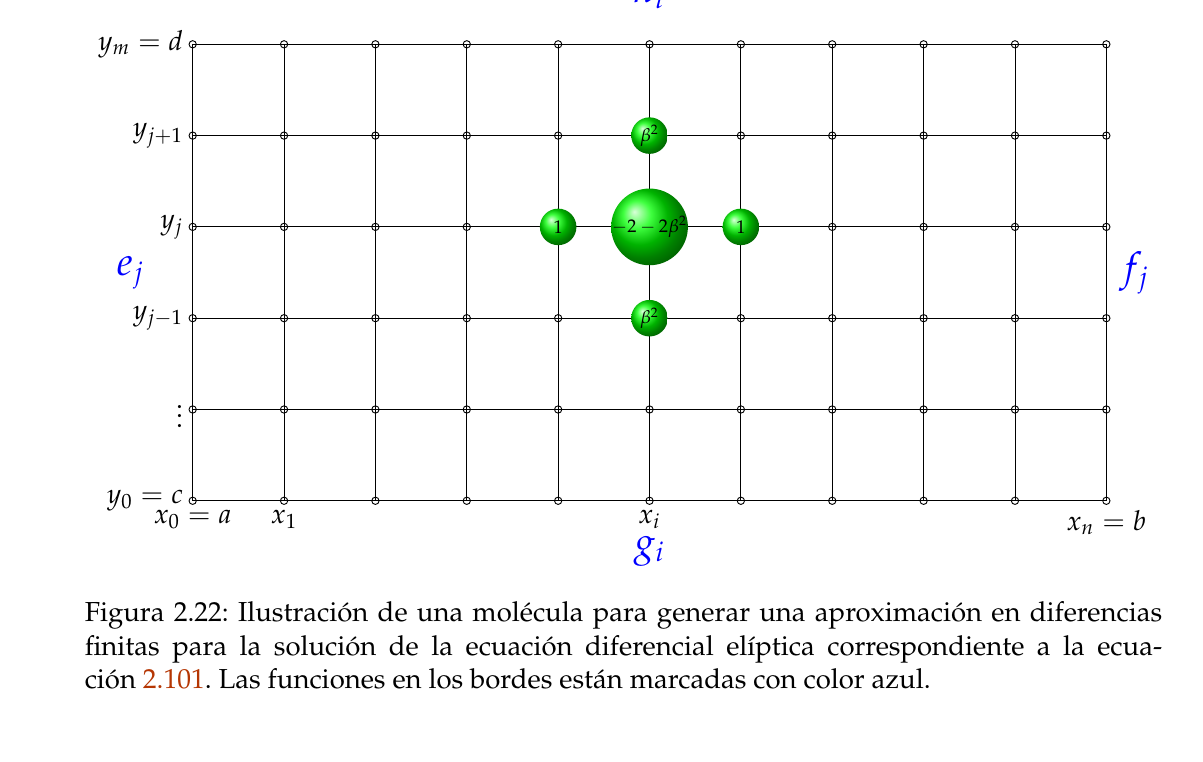

La Figura 2.22 muestra la molécula correspondiente al sistema (2).
Note que todos los nodos son verdes. No hay nodo de salida. A diferencia de los sistemas anteriors (parabólico , hiperbólico) no hay tiempo y todo es sumltáneo. Cualquier cambio en una celda produce cambio en todas las otras de forma simultánea.

En la proxima clase hacemos el empalme comenzando por "ecuacines elípticas¨.

Con el prop'osito de construir un sistema lineal $Ax = b$, vamos a vectorizar la matriz $w_{ij} \to x$

La idea es la siguiente (esto es lo que en `numpy`  es `flatten`

$$11 \to 1  \quad 21 \to 2  \cdots (nx-1) 1 \to nx-1  $$
$$12 \to nx  \quad 22 \to nx+1 \cdots (nx-1)2 \to 2 ( nx -1) $$
$$ \vdots \quad \vdots $$

Para la fila de arriba

Los de la izquierda in indices del tipo $ij$, la derecha son indices del tipo $\ell$.
$$1(ny-1) \to (ny-2)(nx-1) +  1 $$
$$2(ny-1) \to (ny-2)(nx-1) $$
$$ \vdots $$
$$(nx-1)(ny-1) \to (nx-1) ( ny-1) $$

En general
$$ij \to \ell = (j-1)(nx-1) + i \tag{3} $$

Vamos a construir el sistema $Ax =b$.

Comenzamos abajo hacia arriba (izquierda a derecha).

* En la primera fila $j=1$
    * $i=1$ $$g_1 \beta^2 + e_1 -2(1 + \beta^2)w_1 + w_2 + 0 w_3 + \cdots + 0 w_{nx-1} + \beta^2 w_{nx} + 0 w_{nx+1} + \cdots + 0 w_{(nx-1)(ny-1)} = \Delta x^2 \rho_1  $$

    Vamos a mover a la derecha lo que no son incognitas (los terminos  de frontera)
     $$-2(1 + \beta^2)w_1 + w_2 + 0 w_3 + \cdots + 0 w_{nx-1} + \beta^2 w_{nx} + 0 w_{nx+1} + \cdots + 0 w_{(nx-1)(ny-1)}= \Delta x^2 \rho_1 - g_1 \beta^2 - e_1  \tag{4} $$

    * $i=2$ Nos desplazamos uno a la derecha, $\ell=1$
    $$g_2 \beta^2 + w_1 - 2( 1 + \beta^2) w_2 + w_3 + 0 w_4 + \cdots 0 w_{nx} + \beta^2 w_{nx+1}  + 0 w_{nx+1} + \cdots + 0 w_{(nx-1)(ny-1)} = \Delta x^2 \rho_2  $$
    Pasamos a la derecha los terminos de frontera
    $$ w_1 - 2( 1 + \beta^2) w_2 + w_3 + 0 w_4 + \cdots 0 w_{nx} + \beta^2 w_{nx+1}  + 0 w_{nx+1} + \cdots + 0 w_{(nx-1)(ny-1)} = \Delta x^2 \rho_2 - g_2 \beta^2 \tag{5}  $$

    
    Nos deslizamos hasta la ultima celda a la derecha
    * $i=nx-2$ Nos desplazamos uno a la derecha, $\ell=nx-2$
    $$\beta^2 g_{nx-2}  + 0 w_1 + \cdots  0 w_{nx-4} + w_{nx-3} - 2(1 + \beta^2) w_{nx-2} + w_{nx-1} + 0 w_{nx} + \cdots + 0 w_{2 nx-4} + \beta^2 w_{2 nx-3} + 0 w_{2 nx-2} + \cdots + 0 w_{(nx-1)(nx_2)} = \rho_{nx-2} \Delta x^2  $$
    Pasando a la derecha el termino de la frontera
    
    $$0 w_1 + \cdots  0 w_{nx-4} + w_{nx-3} - 2(1 + \beta^2) w_{nx-2} + w_{nx-1} + 0 w_{nx} + \cdots + 0 w_{2 nx-4} + \beta^2 w_{2 nx-3} + 0 w_{2 nx-2} + \cdots + 0 w_{(nx-1)(nx_2)} = \rho_{nx-2} \Delta x^2  - \beta^2 g_{nx-2}  \tag{6} $$

    Vamos para la ultima derecha inferior
    * $i=nx-1$  , $\ell=nx-1$.
    $$\beta^2 g_{nx-1} + 0 w_1 + \cdots + 0 w_{nx-3} + w_{nx-2} - 2(1 + \beta^2) w_{nx-1} + f_1  + 0 w_{nx} + \cdots + 0 w_{2 nx-3} + \beta^2 w_{2 nx-2} + 0 w_{2nx-1} + \cdots + 0 w_{(nx-1)(ny-1)} = \rho_{nx-1} \Delta x^2  $$
    Pasamos a la derecha  los de frontera
    $$ 0 w_1 + \cdots + 0 w_{nx-3} + w_{nx-2} - 2(1 + \beta^2) w_{nx-1} +  0 w_{nx} + \cdots + 0 w_{2 nx-3} + \beta^2 w_{2 nx-2} + 0 w_{2nx-1} + \cdots + 0 w_{(nx-1)(ny-1)} = \rho_{nx-1} \Delta x^2 - \beta^2 g_{nx-1} - f_1  \tag{7} $$

* $j=2$,  segunda fila
    * Posicion $(1,2)$, $\ell= nx$

    $$\beta^2 w_1 + 0 w_2 + \cdots + 0 w_{nx-1} + e_2 + -2(1 + \beta^2) w_{nx} + w_{nx+1} + 0 w_{nx+2} + \cdots + 0 w_{2nx-3} + \beta^2 w_{2nx-1} + 0 w_{2nx} + \cdots 0 w_{(nx-1)(ny-1)} = \rho_{nx} \Delta x^2  $$
    Pasando a la derecha  el termino de frontera

    $$\beta^2 w_1 + 0 w_2 + \cdots + 0 w_{nx-1}  -2(1 + \beta^2) w_{nx} + w_{nx+1} + 0 w_{nx+2} + \cdots + 0 w_{2nx-3} + \beta^2 w_{2nx-1} + 0 w_{2nx} + \cdots 0 w_{(nx-1)(ny-1)} = \rho_{nx} \Delta x^2 - e_2 $$

    * Posicion $(2,2)$, $\ell = nx+1$ (uno a la derecha)
    $$\beta^2 w_2 + 0 w_3 + \cdots  + 0 w_{nx-1} + w_{nx} - 2(1 + \beta^2) w_{nx+1} + w_{nx+2} + 0 w_{nx+3} + \cdots + 0 w_{2nx-1} + \beta^2 w_{2nx} + 0 w_{2nx+1} + \cdots + 0 w_{(nx-1)(ny-1)} = \rho_{nx+1} \Delta x^2 \tag{8}$$


    * Posicion $(nx-1,2)$, $\ell = 2nx-2$ (uno a la derecha)
    $$ \beta^2 w_{nx-1} + 0 w_{nx} + \cdots + 0 w_{2nx-4} + w_{2nx-3} -2(1 + \beta^2) w_{2nx-2} + f_2 + 0 w_{2 nx-1} + \cdots +  0 w_{3nx-4} + w_{3nx-3} + 0 w_{3nx-2} + \cdots + w_{(nx-1)(ny-1)}= \rho_{2nx-2} \Delta x^2$$
    Pasamos la frontera a  la derecha
    $$ \beta^2 w_{nx-1} + 0 w_{nx} + \cdots + 0 w_{2nx-4} + w_{2nx-3} -2(1 + \beta^2) w_{2nx-2} +  0 w_{2 nx-1} + \cdots +  0 w_{3nx-4} + w_{3nx-3} + 0 w_{3nx-2} + \cdots + w_{(nx-1)(ny-1)} = \rho_{2nx-2} \Delta x^2 - f_2 \tag{9}$$


* $j=ny-1$, el elemento $(ny-1,1)$,
    *  $i=1$ $\ell_{(ny-2)(nx-1)+1}$
    $$\beta^2 w_{(ny-3)(nx-1) +1} + 0 w_{(ny-3)(nx-1) + 2} + \cdots + 0 w_{(ny-2)(nx-1) +1} - 2(1 + \beta^2) w_{(ny-2)(nx-1) +1} + w_{(ny-2)(nx-1)+2} + 0 w_{(ny-2)(nx-1)+3} + \cdots + 0 w_{(ny-1)(nx-1)} = \rho_{(ny-2)(nx-1)+1} \Delta x^2 - e_{ny-1} - \beta^2 h_1. \tag{10} $$

    * $i=nx-1$, $\ell=(ny-1)(nx-1)$
    $$ \beta^2 w_{(ny-2)(nx-1)} + 0 w_{(nx-2)(nx-1) +1} + \cdots + 0 w_{(ny-1)(nx-1)-2} + w_{(ny-1)(nx-1) - 1} - 2(1 + \beta^2) w_{(ny-1)(nx-1)} = \rho_{(ny-1)(nx-1)} \Delta x^2 -\beta^2 h_{nx-1} - f_{ny-1}. \tag{11} $$








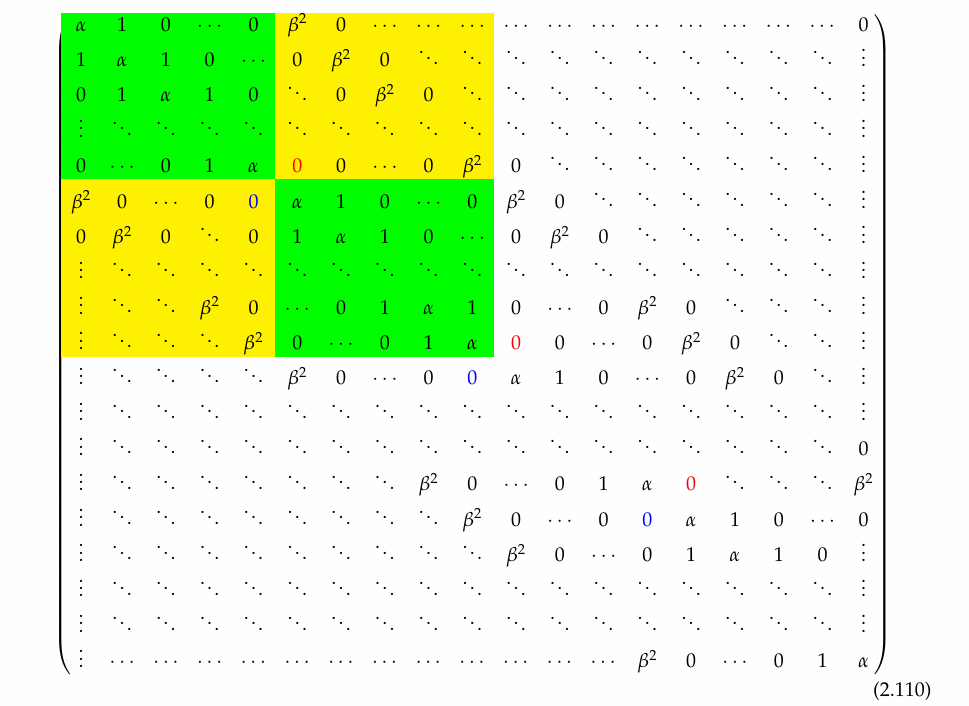

En la matriz anterior $\alpha=-2(1 + \beta^2)$
Esta matriz tiene un patron


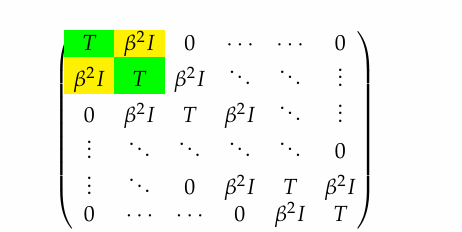

donde $I$ es la identidad y

$$T=
\begin{pmatrix}
\alpha & 1 & 0 & \cdots & 0 \\
1 & \alpha & 1 & \ddots & \vdots   \\
0 & 1 & \alpha & \ddots & 0 \\
\vdots & \ddots & \ddots & \ddots & 1 \\
0 & \cdots & 0 & 1 & \alpha
\end{pmatrix}
$$
Otra forma de entender esta matriz es descomponiendo la estrella en dos partes
como muestra la Figura 2.23.

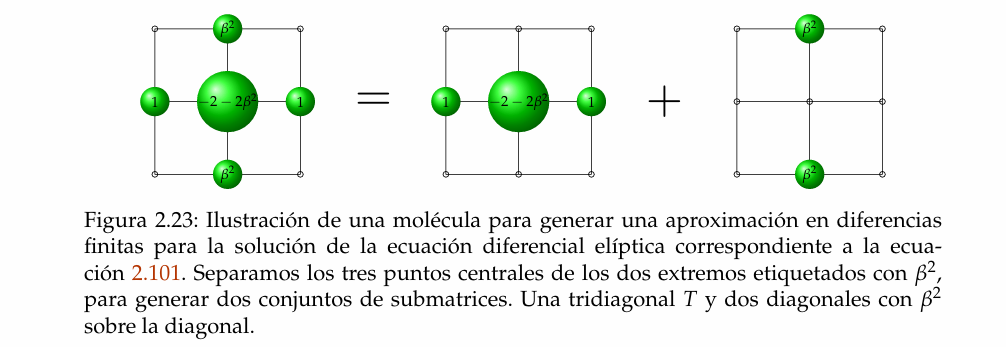

El termino de la derecha en $Ax = b$ es

$$b_\ell = \Delta x^2 \rho_\ell - c_\ell $$

donde $c_\ell$?


$$c = (e_1 + g_1 \beta^2, g_2 \beta^2, \cdots, g_{nx-2} \beta^2 + f_1, e_2, 0, \cdots, 0, f_2, e_3, 0 \cdots, 0, f_3, \cdots  0, \cdots, 0, e_{nx-2}, 0, \cdots, 0, f_{nx-2}, e_{ny-1} , h_1 \beta^2, \cdots, h_{nx-2} \beta^2 , h_{nx-1} \beta^2 + f_{ny-1}  $$

Vamos a ver casos particualares para entender todo este proceso mejor.

* Hay un solo nodo "vivo", que no es frontera.
$$-2(1 + \beta^2) w_{11} = \Delta x^2 \rho_1 - e_1 - f_1 - g_1 \beta^2 - h_1 \beta^2  $$
La soluci'on es claramente
$$w_{11} = \frac{e_1 + f_1 + \beta^2(g_1 + h_1)}{2(1 + \beta^2)} - \frac{\Delta x^2 \rho_1}{2(1 + \beta^2)} $$
Si $\rho_1=0$ entonces $w_{11}$ es un promedio ponderado de las cuatro puntos de frontera. Es mass, si $\beta=1$ ($\Delta x = \Delta y$)
$$w_{11} = \frac{e_1 + f_1 + g_1 + h_1}{4} $$

* $nx=1$, $ny>1$.
$$-2(1 + \beta^2) w_{11} + \beta^2 w_{12} =  \Delta x^2 \rho_1 - g_1 \beta^2 - e_1 - f_1 $$
$$\beta^2 w_{11} -2(1 + \beta^2) w_{12} + \beta^2 w_{13} = \Delta x^2 \rho_2 - e_2 - f_2  $$

La ultima ecuacion es

$$\beta^2 w_{1 ny-2}  - 2(1 + \beta^2) w_{1 ny-1} = \Delta x^2 \rho_{ny-1} - e_{ny-1} - f_{ny-1} - h_1 \beta^2  $$

La matriz para este sistema es

$$
\begin{pmatrix}
-2(1 + \beta^2) & \beta^2 & 0 & \cdots & \cdots & 0 \\
\beta^2 & -2(1 + \beta^2) & \beta^2 & 0 & \cdots & \vdots \\
0 & \ddots & \ddots & \ddots & \ddots & \vdots \\
0 & \ddots & \ddots & \ddots & \ddots & \beta^2 \\
0 & \cdots & \cdots & 0 & \beta^2 & -2(1 + \beta^2)
\end{pmatrix}
$$

El vector $b$ es

$$b = \Delta x^2 \rho_i - c_i  $$
donde

\begin{eqnarray}
c_1 &=& -g_1 \beta^2 -e_1 - f_1 \\
c_2 &=& -e_2 - f_2 \\
&\vdots& \\
c_{n-2} &=& -e_{n-2} - f_{n-2} \\
c_{n-1} &=&  -e_{n-1} - f_{n-1} - h_1 \beta^2
\end{eqnarray}

### Caso dos internas en $x$.
1. $ny=2$.


\begin{eqnarray}
-2(1 + \beta^2) w_1 + w_2 + \beta^2 w_3 &=& \Delta x^2 \rho_1 -  e_1 - \beta^2 g_1  \\
w_1 - 2(1 + \beta^2) w_2 + \beta^2 w_4 &=& \Delta x^2 \rho_2 - f_1 - \beta^2 g_2 \\
\beta^2 w_1 - 2(1 + \beta^2) w_3 + w_4 &=& \Delta x^2 \rho_3 - e_2 - \beta^2 h_1 \\
\beta^2 w_2 + w_3 - 2(1 + \beta^2) w_4 &=& \Delta x^2 \rho_4 - f_2 - \beta^2 h_2
\end{eqnarray}
La matriz $A$$ es

$$
A = \begin{pmatrix}
-2(1 + \beta^2) & 1 & \beta^2 & 0  \\
1 & -2(1 + \beta^2) & 0 & \beta^2 \\
\beta^2 & 0 & -2(1 + \beta^2) & 1 \\
0 & \beta^2 & 1 & -2(1 + \beta^2)
\end{pmatrix}
$$

El vector $c$ es
\begin{eqnarray}
c_1 = -e_1 - \beta^2 g_1 \\
c_2 = -f_1 - \beta^2 g_2 \\
c_3 = -e_2 - \beta^2 h_1 \\
c_4 = -f_2 - \beta^2 h_2 \\
\end{eqnarray}

Aca tambien hay  un patron.

$$A = \begin{pmatrix} B & \beta^2 I \\ \beta^2 I & B \end{pmatrix}  $$

donde
$$B = \begin{pmatrix} \alpha & 1 \\ 1 & \alpha \end{pmatrix} $$


Pensemos en $nx=2$ (internos) y $ny>3$.

$$-2(1 + \beta^2) w_1 + w_2 + \beta^2 w_3 = \Delta x^2 \rho_1 - e_1 -  \beta^2 g_1  $$

nos movemos uno a la derecha

$$w_1 - 2(1 + \beta^2) w_2 + \beta^2 w_4 = \Delta x^2 \rho_2 -f_1 - \beta^2 g_2 $$

los ultimos dos

$$\beta^2 w_{2ny-5} - 2(1 + \beta^2) w_{2ny -3} + w_{2ny -2} = \Delta x^2 \rho_{2ny-3} - e_{ny-1} - \beta^2 h_1 $$


La ultima es

$$\beta^2 w_{2 ny -4} + w_{2 ny-3} - 2(1 + \beta^2) w_{2ny -2} = \Delta x^2 \rho_{2ny -2} - f_{ny-1} - \beta^2 h_2$$